This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

# (a)

In [2]:
# (a)
# data preprocessing
df = pd.read_csv('data.csv',header = None)
X_df = df.iloc[1:]
X_array = X_df.to_numpy()
X_df_reshape = pd.DataFrame(X_array.reshape(2000,2),columns = ['ionic_current','residence_time'])
X_df_reshape['label'] = X_df_reshape.index%20
X = X_df_reshape[['ionic_current','residence_time']]
X['residence_time'] = X['residence_time'].astype(float)
y = X_df_reshape['label']
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.3)
X_Kmeans_result = pd.DataFrame(X_train.copy(), columns = ['ionic_current','residence_time'])
# X_df_reshape.to_csv('preprocess.csv')

<ipython-input-2-6bd79293772c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['residence_time'] = X['residence_time'].astype(float)


# (b)

In [3]:
# (b)
kmeans_model = KMeans(n_clusters = 20)
pred_labels = kmeans_model.fit_predict(X_train)
X_Kmeans_result['pred_labels'] = pd.Series(pred_labels)
centroids = kmeans_model.cluster_centers_

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, 
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Text(0, 0.5, 'residence_time')

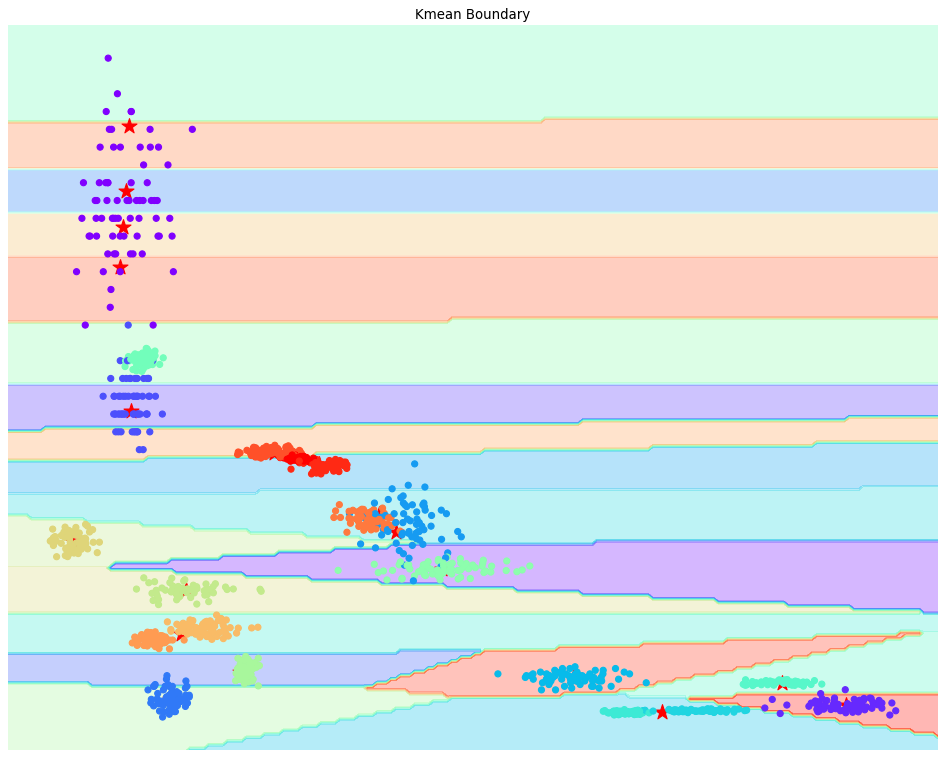

In [5]:
figure(figsize=(15, 12), dpi=80)
visualize_classifier(kmeans_model, X_train, y_train)
plt.scatter(centroids[:,0] , centroids[:,1] , marker = '*',s = 200, color = 'red')
plt.title('Kmean Boundary')
plt.xlabel('ionic_current')
plt.ylabel('residence_time')

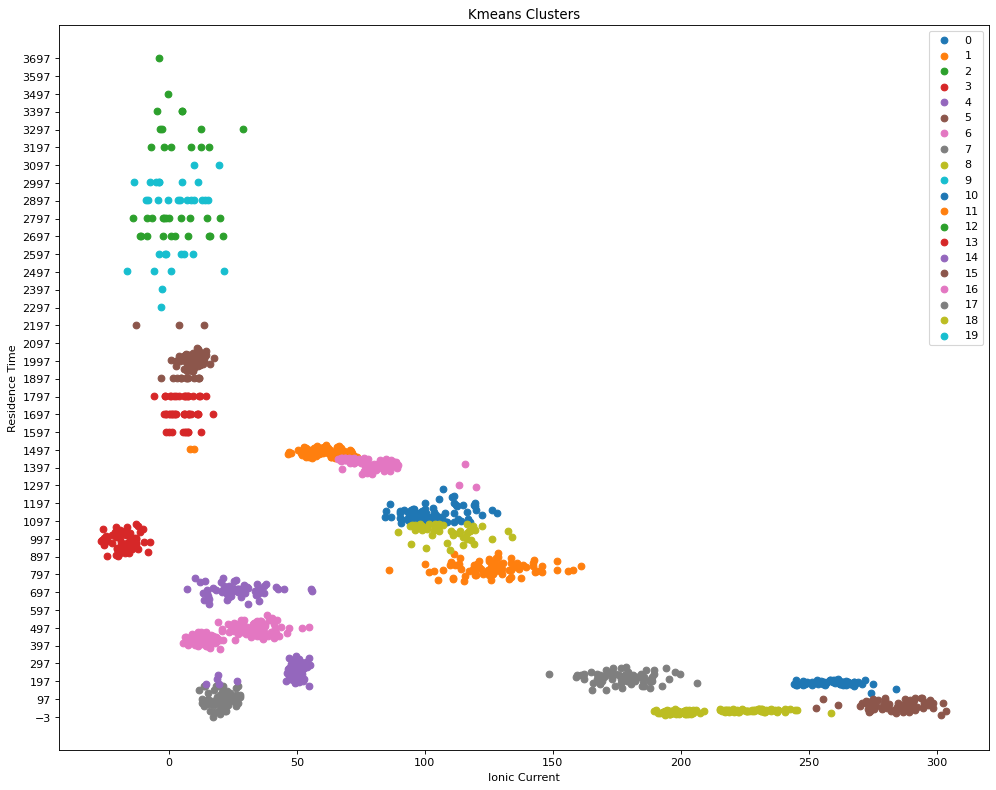

In [6]:
figure(figsize=(15, 12), dpi=80)
for i in range(0,20):
    df_cluster = X_Kmeans_result[X_Kmeans_result.pred_labels == i]
    plt.scatter(df_cluster.ionic_current,df_cluster.residence_time, label = i)
plt.yticks(np.arange(min(X_Kmeans_result.residence_time), max(X_Kmeans_result.residence_time), 100))
plt.title('Kmeans Clusters')
plt.xlabel('Ionic Current')
plt.ylabel('Residence Time')
plt.legend()
plt.show()

# (c)

In [7]:
# (c)
# random forest
rfc_default = RandomForestClassifier()
rfc_default.fit(X_train,y_train)
rfc_default_pred = rfc_default.predict(X_test)
print('The accuracy score:', accuracy_score(y_test, rfc_default_pred),'%')

The accuracy score: 0.975 %


Text(0, 0.5, 'residence_time')

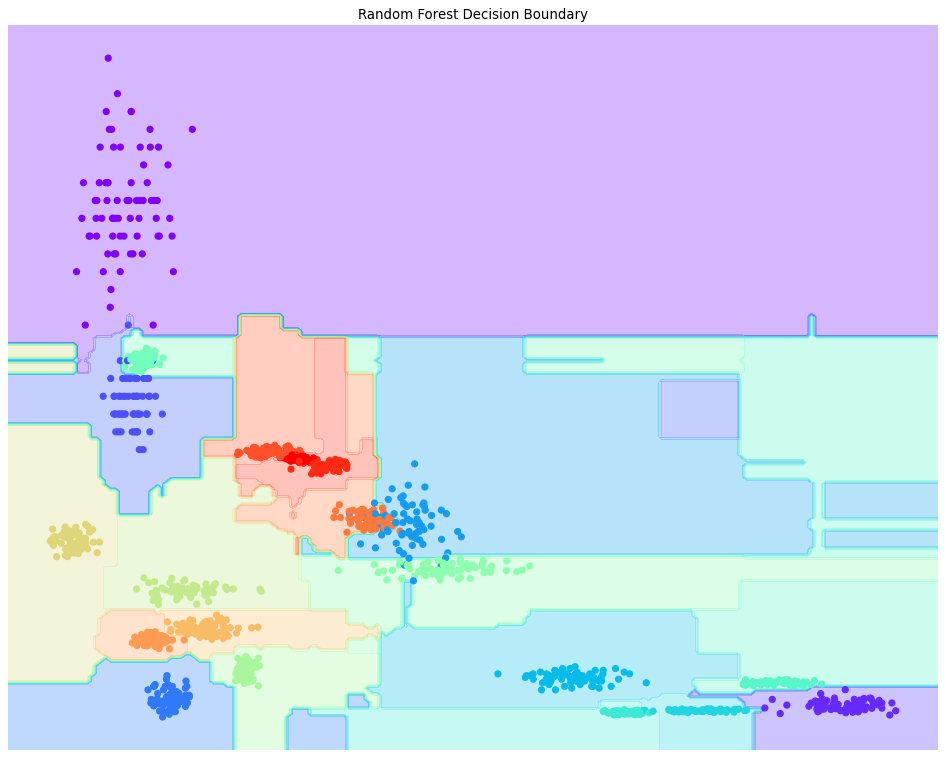

In [8]:
figure(figsize=(15, 12), dpi=80)
visualize_classifier(rfc_default, X_train, y_train)
plt.title('Random Forest Decision Boundary')
plt.xlabel('ionic_current')
plt.ylabel('residence_time')

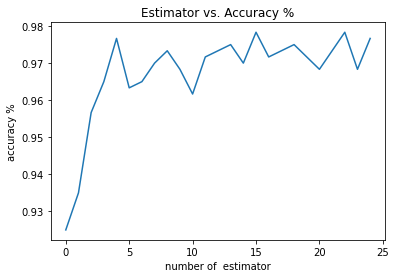

In [9]:
acc_lst = []
for n_estimator in range(1,26):
    rfc = RandomForestClassifier(n_estimators = n_estimator)
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    acc_lst.append(accuracy_score(y_test, rfc_pred))
plt.title('Estimator vs. Accuracy %')
plt.xlabel('number of  estimator')
plt.ylabel('accuracy %')
plt.plot(acc_lst)

# (d)
# Analysis


The decision boundary for Kmeans is linear and has more horizontal components compared to random forest. The random forest boundary is also linear but horizontal property is not obvious. The performance for the random forest model increases with the number of estimators, but the accuracy plateaus after certain number of estimators so more does not garauntee better performance. Accuracy for the random forest model has an accuracy above 92% for all numbers of estimators.